In [1]:
from bs4 import BeautifulSoup
import urllib.request               
from time import sleep
from datetime import datetime
import pandas as pd
import requests
import re
from datetime import date
#importind required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def getweather():
    weather = []
    url = "https://weather.com/en-IN/weather/today/l/cfbbe06e16c929cd8129f5901fd07d6772c6a8b87ce27e4c22766e927f05990f"
    day = date.today().day
    weather.append(day)
    month = date.today().month
    weather.append(month)
    year = date.today().year
    weather.append(year)
    
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    temp = soup.find("span",class_="CurrentConditions--tempValue--MHmYY").text[:-1]

    time = soup.find("div",class_="CurrentConditions--header--kbXKR").text[-9:]

    weather.append(time)
    weather.append(temp)
    condition = soup.find("div",class_="CurrentConditions--phraseValue--mZC_p").text
    weather.append(condition)

    highlow = soup.find("div",class_="WeatherDetailsListItem--wxData--kK35q").text

    print("highlow:",highlow)

    high = highlow.split("/")[0][:-1]
    if not high.isdigit():
        high = 0
    low = highlow.split("/")[1][1:-1]
    if not low.isdigit():
        low = 0

    weather.append(high)
    weather.append(low)

    wind = soup.select("div.WeatherDetailsListItem--wxData--kK35q")[1].text
    wind = wind[5:]
    wind = wind[:-4]
    wind = ''.join(char for char in wind if char.isdigit())
    weather.append(wind)

    Humidity = soup.select("div.WeatherDetailsListItem--wxData--kK35q")[2].text
    Humidity = Humidity[:-1]

    dew = soup.select("div.WeatherDetailsListItem--wxData--kK35q")[3].text
    dew = dew[:-1]
    weather.append(dew)

    pressure = soup.select("div.WeatherDetailsListItem--wxData--kK35q")[4].text
    pressure = pressure[:-3]
    pressure = pressure[10:]
    match = re.search(r'\d+(\.\d+)?', pressure)

    if match:
        extracted_number = float(match.group())
        weather.append(pressure)
    else:
        print("No number found in the string.")
    visibility = soup.select("div.WeatherDetailsListItem--wxData--kK35q")[6].text
    visibility = visibility[:-3]
    weather.append(visibility)
    if(int(temp)>=30):
        heat = "YES"
    else:
        heat = "NO"
    weather.append(heat)
    if(int(Humidity)>=80):
        wet = "YES"
    else:
        wet = "NO"
    weather.append(wet)
    print("Day : ",day)
    print("Month : ",month)
    print("Year : ",year)
    print("Time : ",time)
    print("Temperature : ",temp)
    print("Condition : ",condition)
    print("High/Low : {}/{}".format(high,low))
    print("Wind : ",wind)
    print("Humidity : ",Humidity)
    print("Dew Point : ",dew)
    print("Pressure : ",pressure)
    print("Visibility : ",visibility)
    print("Heat : ",heat)
    print("Wet : ",wet)
    return weather

In [3]:
getweather()

highlow: --/22°
Day :  27
Month :  2
Year :  2024
Time :  23:59 IST
Temperature :  26
Condition :  Partly Cloudy
High/Low : 0/2
Wind :  13
Humidity :  48
Dew Point :  14
Pressure :  12.9
Visibility :  14.48
Heat :  NO
Wet :  NO


[27,
 2,
 2024,
 '23:59 IST',
 '26',
 'Partly Cloudy',
 0,
 '2',
 '13',
 '14',
 '12.9',
 '14.48',
 'NO',
 'NO']

In [7]:
import csv
import openpyxl
import sys

def main():
    print("Collecting  Weather Data in a intervals of 30 mins")
    idx = 0
    weatherdata = {'Day':[],'Month':[],'Year':[],'mean_temp':[],'max_temp':[],'min_temp':[],'meanhum':[],'meandew':[],'pressure':[],'heat':[],'wet':[]}
    filename = 'data.xlsx'
    wb = openpyxl.load_workbook(filename=filename)
    sheet = wb['Sheet1']
    #new_row = ['Day','Month','Year','mean_temp','max_temp','min_temp','meanhum','meandew','pressure','heat','wet']
    #sheet.append(new_row)
    while idx < 1:
        print('collecting weather data '+str(idx))
        tmp = getweather()
        weatherdata['Day'].append(tmp[0])
        weatherdata['Month'].append(tmp[1])
        weatherdata['Year'].append(tmp[2])
        weatherdata['mean_temp'].append(tmp[4])
        weatherdata['max_temp'].append(tmp[6])
        weatherdata['min_temp'].append(tmp[7])
        weatherdata['meanhum'].append(tmp[8])
        weatherdata['meandew'].append(tmp[9])
        weatherdata['pressure'].append(tmp[10])
        weatherdata['heat'].append(tmp[12])
        weatherdata['wet'].append(tmp[13])
        
        try :
            new_row = [int(tmp[0]),int(tmp[1]),int(tmp[2]),float(tmp[4]),float(tmp[6]),float(tmp[7]),float(tmp[8]),float(tmp[9]),float(tmp[10]),tmp[12],tmp[13]]
            sheet.append(new_row)
        except ValueError as e:
            print (e)
        idx+=1
    wb.save(filename)
    
    print(weatherdata)

In [8]:
main()

collecting weather data 0
highlow: --/22°
Day :  28
Month :  2
Year :  2024
Time :  23:59 IST
Temperature :  26
Condition :  Partly Cloudy
High/Low : 0/2
Wind :  13
Humidity :  48
Dew Point :  14
Pressure :  12.9
Visibility :  14.48
Heat :  NO
Wet :  NO
{'Day': [28], 'Month': [2], 'Year': [2024], 'mean_temp': ['26'], 'max_temp': [0], 'min_temp': ['2'], 'meanhum': ['13'], 'meandew': ['14'], 'pressure': ['12.9'], 'heat': ['NO'], 'wet': ['NO']}


In [9]:
import pandas as pd
data_xls = pd.read_excel('data.xlsx', 'Sheet1', index_col=None)
data_xls.to_csv('data.csv', encoding='utf-8', index=False)

In [10]:
#importing classes to handle data,to split data into training and testing sets,to visualising of tree and to cheak accuracy of our model
from preprocessing import splitter
from preprocessing import Encoder
from preprocessing import scaler
from metrics import matrix
from treeVis import vis
sp=splitter()
mt=matrix()
vs=vis()
sc=scaler()
en=Encoder()

In [11]:
#importing dataset
dataset=pd.read_csv("data.csv")
dataset.tail()

Day  Month  Year  mean_temp  max_temp  min_temp  meanhum  meandew  \
647   27      8  2019       28.6      31.4      26.9       88     26.3   
648   31      8  2019       26.9      30.3      25.0       91     25.3   
649   27      2  2024       33.0      34.0       2.0        3     14.0   
650   27      2  2024       34.0       0.0       2.0        6     13.0   
651   28      2  2024       26.0       0.0       2.0       13     14.0   

     pressure heat  wet  
647    1008.1   NO  YES  
648    1007.8   NO  YES  
649    1009.1  YES   NO  
650    1009.1  YES   NO  
651      12.9   NO   NO

In [12]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
dataset.iloc[:,0]=lab.fit_transform(dataset.iloc[:,0])
dataset.iloc[:,1]=lab.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,2]=lab.fit_transform(dataset.iloc[:,2])
dataset.iloc[:,3]=lab.fit_transform(dataset.iloc[:,3])
dataset.iloc[:,4]=lab.fit_transform(dataset.iloc[:,4])
dataset.iloc[:,5]=lab.fit_transform(dataset.iloc[:,5])
dataset.iloc[:,6]=lab.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,7]=lab.fit_transform(dataset.iloc[:,7])
dataset.iloc[:,8]=lab.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,9]=lab.fit_transform(dataset.iloc[:,9])
dataset.iloc[:,10]=lab.fit_transform(dataset.iloc[:,10])

dataset.tail()

Day  Month  Year  mean_temp  max_temp  min_temp  meanhum  meandew  \
647   26      1    20       34.0      51.0      35.0       30     37.0   
648   30      1    20       17.0      40.0      16.0       33     27.0   
649   26      0    21       63.0      77.0       0.0        0      1.0   
650   26      0    21       64.0       0.0       0.0        1      0.0   
651   27      0    21        8.0       0.0       0.0        2      1.0   

     pressure heat wet  
647     123.0    0   1  
648     120.0    0   1  
649     133.0    1   0  
650     133.0    1   0  
651       0.0    0   0

In [13]:
#deviding data into dependant and independant sets
x = dataset[['Day','Month','Year']]
y = dataset['heat']
z = dataset['wet']

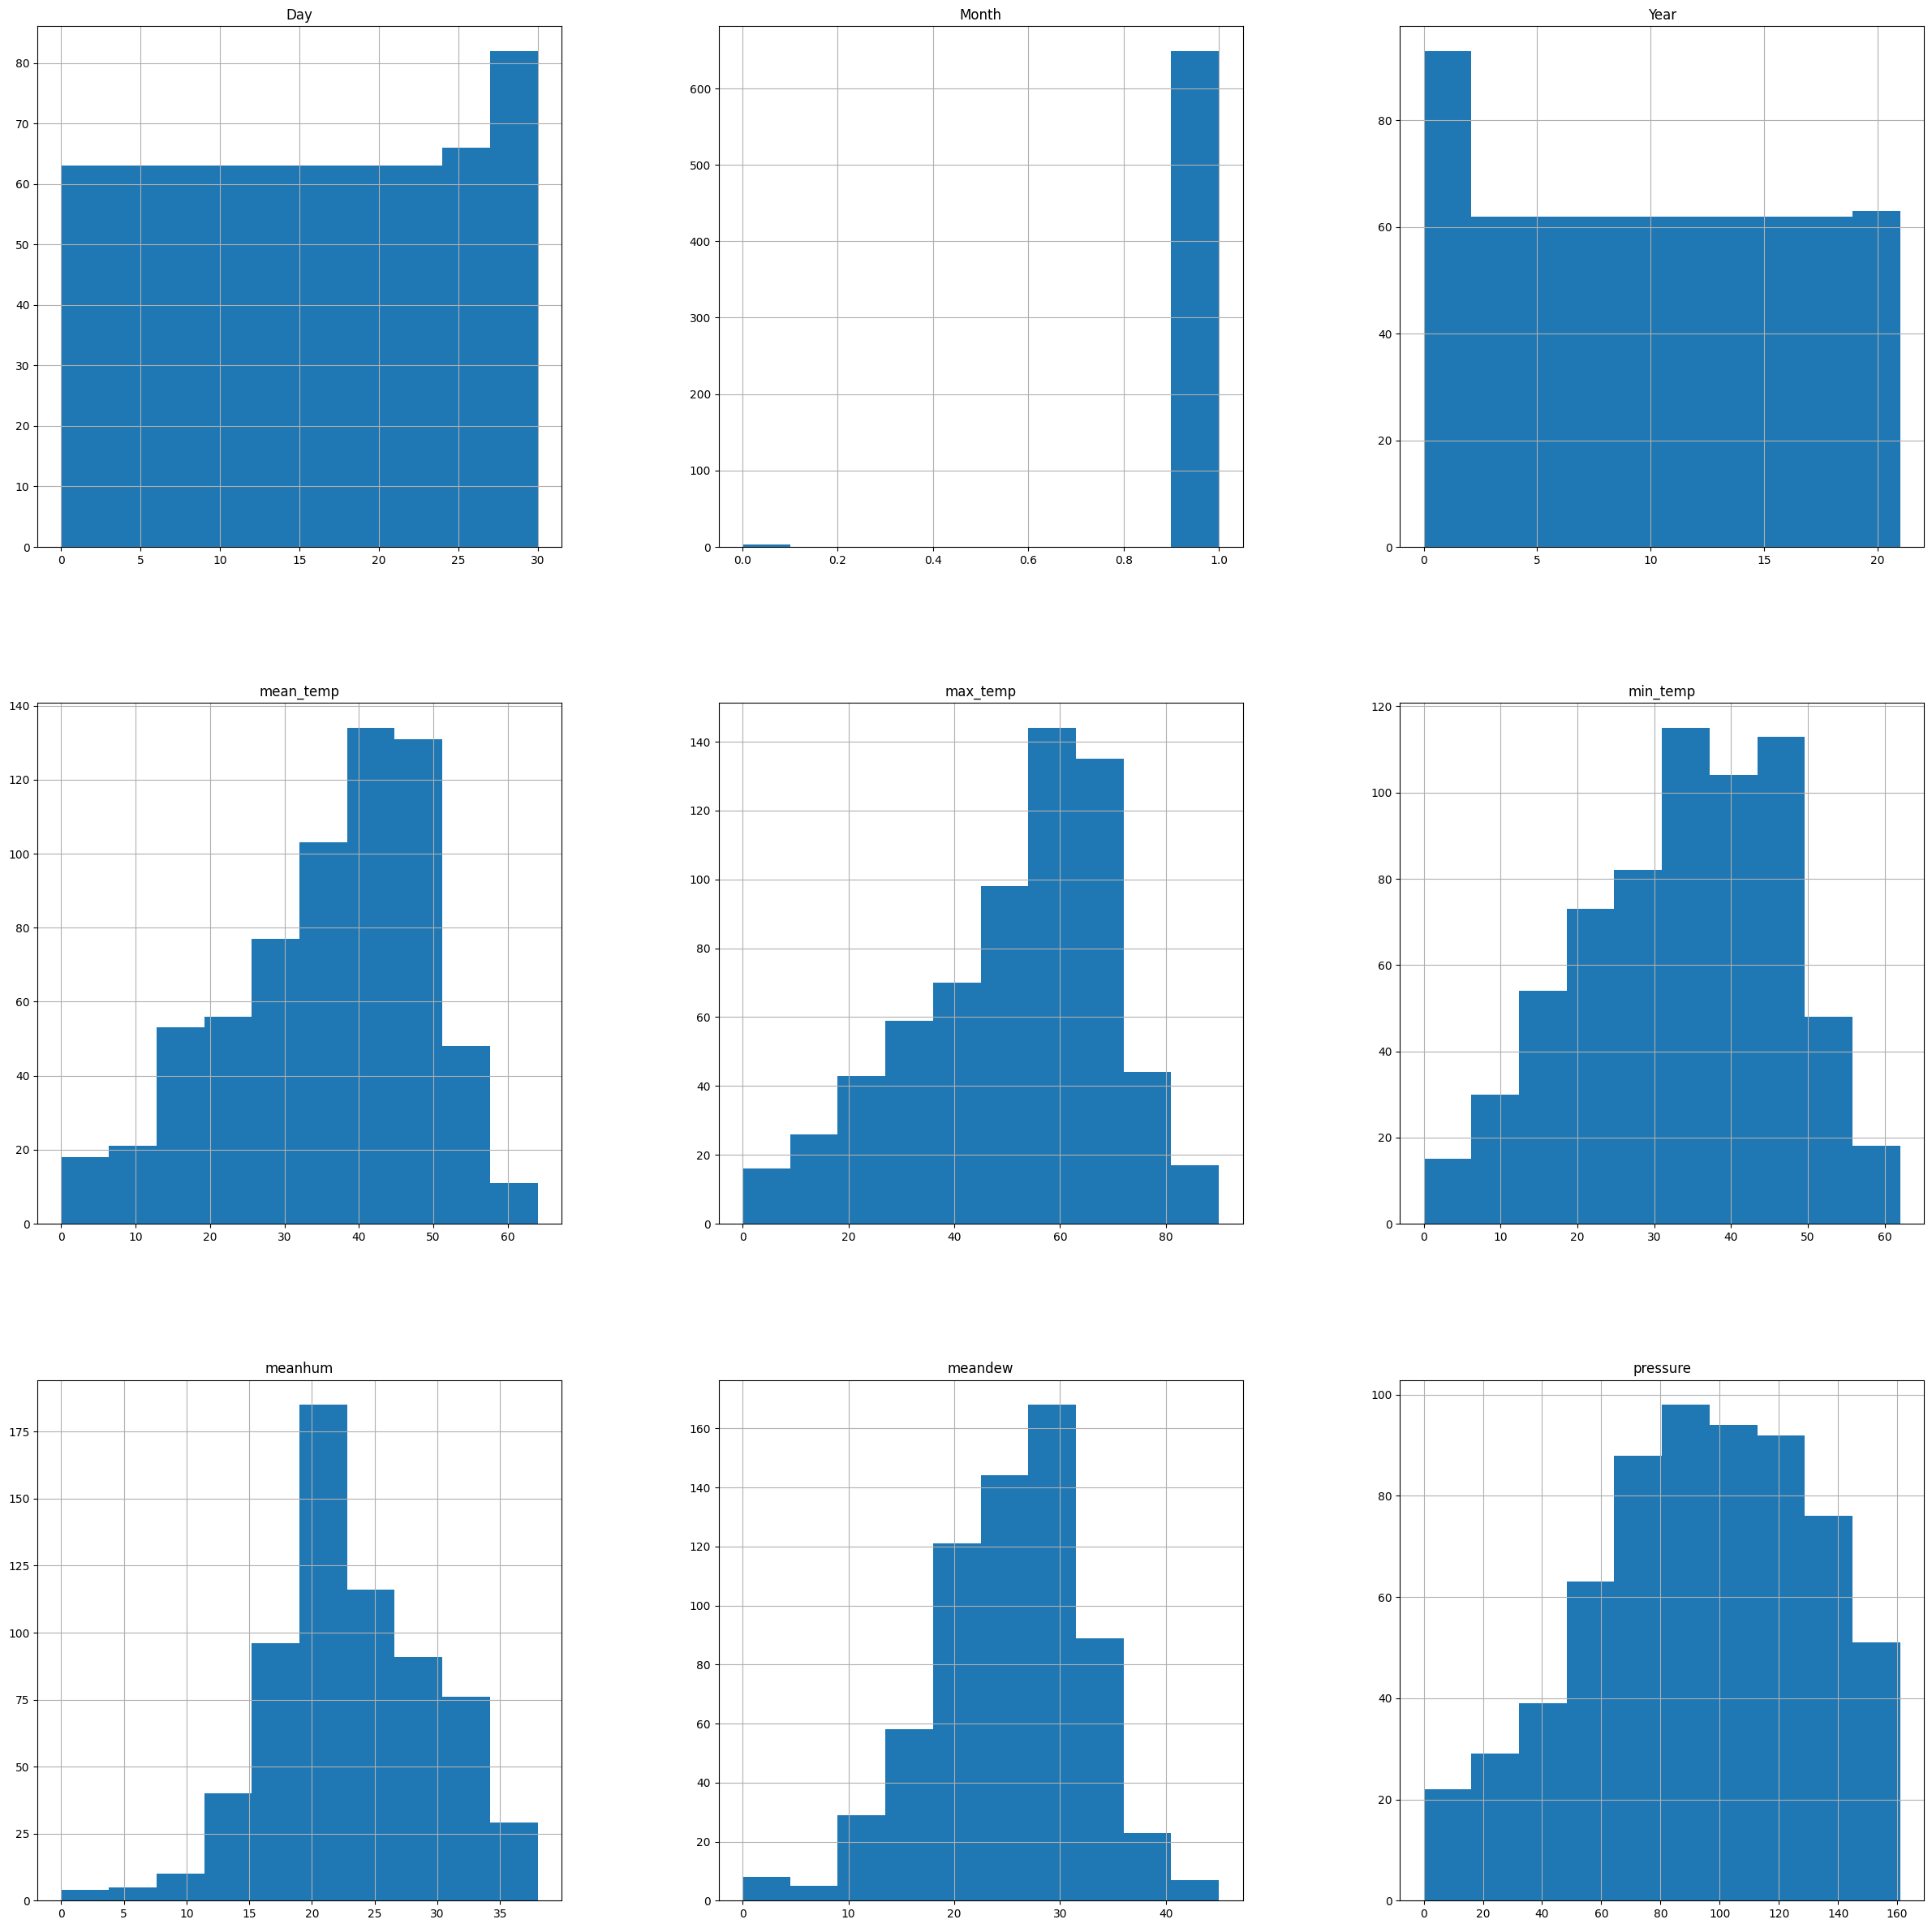

In [14]:
#visualising each attribute of dataset using histogram
dataset.hist(figsize = (30, 30))
plt.savefig("dataset.png")
plt.show()

In [15]:
#deviding data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.20,random_state=42)

In [16]:
#importing decision tree model and fitting training data to it
from sklearn.tree import DecisionTreeClassifier
y = y.astype(int)
z = z.astype(int)
print(y.unique())
print(z.unique())

classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x,y)

classifier_z=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_z.fit(x,z)

[1 0]
[0 1]


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
#predicting values for x_test and compairing result with y_test
print("Heat:-")
y_pred=classifier.predict(x_test)
print("predicted values:-")
print(y_pred.astype(int))
y_test_arr=np.array(y_test)
print("original values:-")
print(y_test_arr)

#predicting values for x_test and compairing result with y_test
print("Wet:-")
z_pred=classifier_z.predict(x_test)
print("predicted values:-")
print(z_pred.astype(int))
z_test_arr=np.array(z_test)
print("original values:-")
print(z_test_arr)

Heat:-
predicted values:-
[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1]
original values:-
[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1]
Wet:-
predicted values:-
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0]
original values:-
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 

In [18]:
#cheaking accuracy of our model
accuracy=mt.accuracy(y_pred,y_test)
print("{}%".format(accuracy*100))

accuracy=mt.accuracy(z_pred,z_test)
print("{}%".format(accuracy*100))

ValueError: Classification metrics can't handle a mix of binary and unknown targets

In [19]:

import os
 
os.environ["PATH"] += os.pathsep + 'graphviz-2.38/release/bin'
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

print(os.environ["PATH"])

c:\Users\vedan\AppData\Local\Microsoft\WindowsApps;c:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\Scripts;C:\Program Files\ImageMagick-7.1.1-Q16-HDRI;C:\Program Files (x86)\Common Files\Intel\Shared Libraries\redist\intel64\compiler;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\dotnet\;C:\Program Files\Git\cmd;D:\Selrom Software\MySQL 5.0\bin;C:\Program Files\Java\jre1.8.0_281\bin;C:\Program Files\Java\jdk1.8.0_281\bin;C:\ProgramData\chocolatey\bin;C:\Program Files\nodejs\;C:\Program Files\Docker\Docker\resources\bin;D:\Program Files\Cocolang;D:\Program Files\Cocolang;C:\Program Files\Amazon\AWSCLIV2\;C:\Users\vedan\AppData\Local\Microsoft\WindowsApps;C:\Users\vedan\AppData\Local\Programs\Microsoft VS Cod

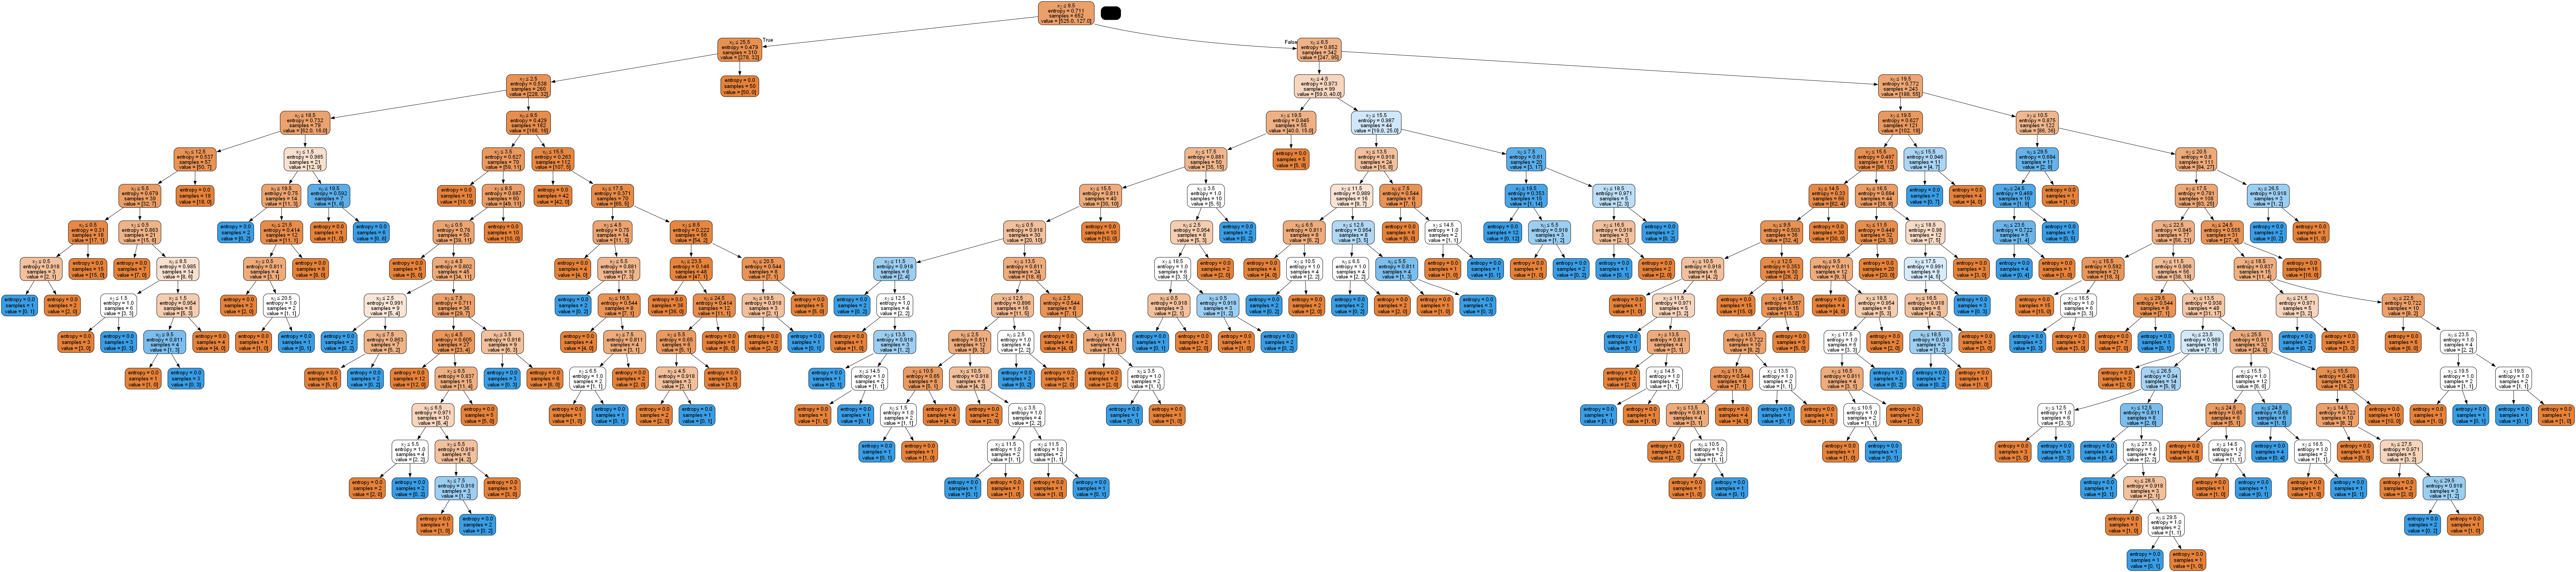

In [20]:
#tree visualisation

vs.dtree_visual(classifier)

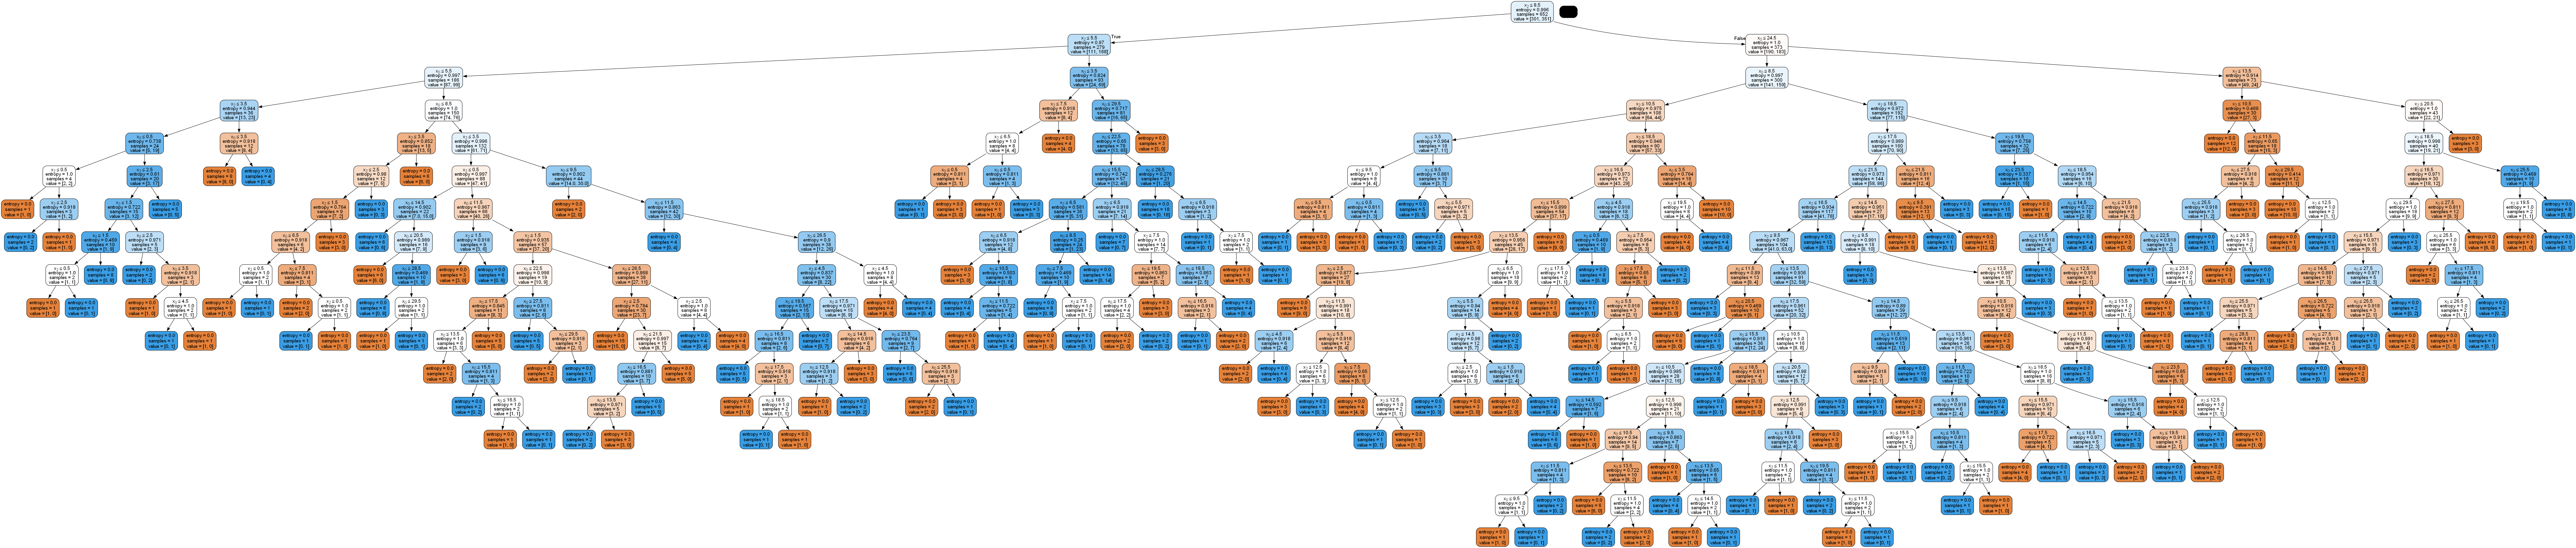

In [21]:
#tree visualisation

vs.dtree_visual(classifier_z)

In [22]:
from datetime import date
now = date.today()
filepath = "prediction/forecast-"+str(now)+".xlsx"
def prediction():
    wb = openpyxl.Workbook()
    wb.save(filepath)
    print("Predict Weather Data ")
    idx = 0
    weatherdata = {'Day':[],'Month':[],'Year':[],'heat':[],'wet':[]}
    filename = filepath
    wb = openpyxl.load_workbook(filename=filename)
    sheet = wb['Sheet']
    new_row = ['Day','Month','Year','Heat','Wet']
    sheet.append(new_row)
    while idx < 31:
        print('Predict weather data '+str(idx))
        year = date.today().year
        yr = year - 1999
        if(date.today().day==31):
            year +=1
            yr +=1
        y_pred=classifier.predict([[idx,0,yr]])
        print(y_pred.astype(int))
        z_pred=classifier_z.predict([[idx,0,yr]])
        print(z_pred.astype(int))
        tmp_d = idx+1
        tmp_m = 8
        tmp_y = year
        tmp_h = y_pred.astype(int)
        tmp_w = z_pred.astype(int)
        if(int(tmp_h)==0):
            tmp_h_char = "NO"
        else:
            tmp_h_char = "YES"
        if(int(tmp_w)==0):
            tmp_w_char = "NO"
        else:
            tmp_w_char = "YES"    
        new_row = [int(tmp_d),int(tmp_m),int(tmp_y),tmp_h_char,tmp_w_char]
        sheet.append(new_row)
        idx+=1
    wb.save(filename)
    
    print(weatherdata)

In [24]:
prediction()

Predict Weather Data 
Predict weather data 0
[0]
[1]
Predict weather data 1
[0]
[1]
Predict weather data 2
[0]
[1]
Predict weather data 3
[0]
[1]
Predict weather data 4
[0]
[0]
Predict weather data 5
[0]
[0]
Predict weather data 6
[1]
[0]
Predict weather data 7
[1]
[0]
Predict weather data 8
[1]
[0]
Predict weather data 9
[1]
[1]
Predict weather data 10
[1]
[1]
Predict weather data 11
[1]
[1]
Predict weather data 12
[1]
[0]
Predict weather data 13
[1]
[1]
Predict weather data 14
[1]
[0]
Predict weather data 15
[1]
[1]
Predict weather data 16
[0]
[1]
Predict weather data 17
[0]
[1]
Predict weather data 18
[0]
[1]
Predict weather data 19
[0]
[0]
Predict weather data 20
[1]
[0]
Predict weather data 21
[1]
[0]
Predict weather data 22
[1]
[1]
Predict weather data 23
[1]
[0]
Predict weather data 24
[1]
[1]
Predict weather data 25
[1]
[0]
Predict weather data 26
[1]
[0]
Predict weather data 27
[0]
[0]
Predict weather data 28
[0]
[0]
Predict weather data 29
[0]
[0]
Predict weather data 30
[0]


C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vedan\AppData\Local\Temp\ipykernel_10540\1613588268.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if(int(tmp_h)==0):
C:\Users\vedan\AppData\Local\Temp\ipykernel_10540\1613588268.py:35: DeprecationWarning: Conversion of an array with ndim >

In [25]:
data_xls = pd.read_excel(filepath, 'Sheet', index_col=None)
data_xls.to_csv("prediction/forecast-"+str(now)+".csv", encoding='utf-8', index=False)

In [26]:
#importing dataset
data_pred=pd.read_csv("prediction/forecast-"+str(now)+".csv")
data_pred

Day  Month  Year Heat  Wet
0     1      8  2024   NO  YES
1     2      8  2024   NO  YES
2     3      8  2024   NO  YES
3     4      8  2024   NO  YES
4     5      8  2024   NO   NO
5     6      8  2024   NO   NO
6     7      8  2024  YES   NO
7     8      8  2024  YES   NO
8     9      8  2024  YES   NO
9    10      8  2024  YES  YES
10   11      8  2024  YES  YES
11   12      8  2024  YES  YES
12   13      8  2024  YES   NO
13   14      8  2024  YES  YES
14   15      8  2024  YES   NO
15   16      8  2024  YES  YES
16   17      8  2024   NO  YES
17   18      8  2024   NO  YES
18   19      8  2024   NO  YES
19   20      8  2024   NO   NO
20   21      8  2024  YES   NO
21   22      8  2024  YES   NO
22   23      8  2024  YES  YES
23   24      8  2024  YES   NO
24   25      8  2024  YES  YES
25   26      8  2024  YES   NO
26   27      8  2024  YES   NO
27   28      8  2024   NO   NO
28   29      8  2024   NO   NO
29   30      8  2024   NO   NO
30   31      8  2024   NO   NO

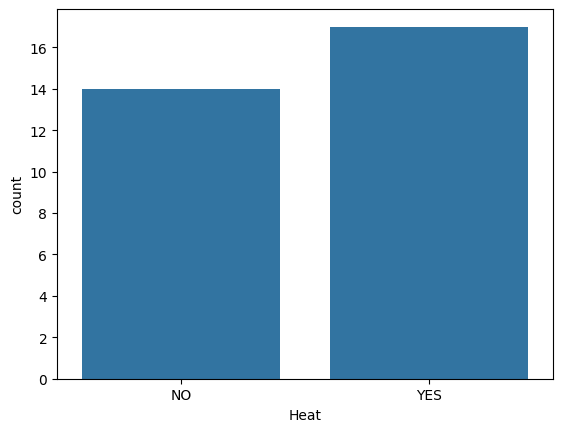

In [27]:
import seaborn as sns
sns_plot = sns.countplot(x='Heat',data=data_pred)
fig = sns_plot.get_figure()
fig.savefig("prediction/heat_summary_prediction-"+str(now)+".png")

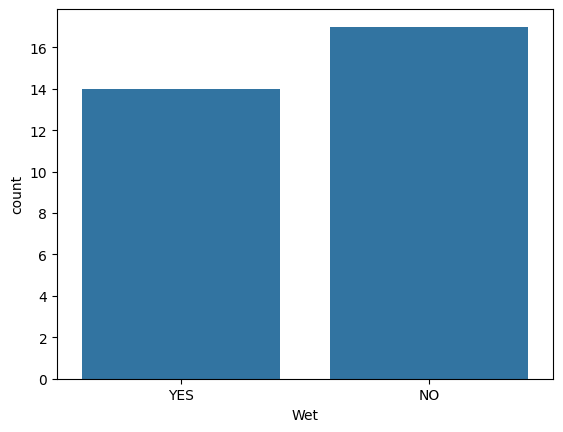

In [28]:
sns_plot =sns.countplot(x='Wet',data=data_pred)
fig = sns_plot.get_figure()
fig.savefig("prediction/wet_summary_prediction-"+str(now)+".png")